### Student Information
Name: Truong Ngoc Khoi Nguyen

Student ID: D142113032

GitHub ID: nguyentr0101

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [122]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [123]:
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
!pip3 install PAMI
import PAMI
import umap


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
DATA_PATH = "newdataset/Reddit-stock-sentiment.csv"
df= pd.read_csv(DATA_PATH)

print("\nFirst 5 records:")
print(df.head())

print("\nData types:")
print(df.dtypes)

text_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nText columns found: {text_columns}")

# Keep only what we need
X = pd.DataFrame()
X['text'] = df['title'] + ' ' + df['text']  # Combine title and text
X['category'] = df['label']  # Numerical label
X['category_name'] = df['label'].map({-1: 'negative', 0: 'neutral', 1: 'positive'})

print(f"Dataset shape: {X.shape}")
print(f"\nCategory distribution:")
print(X['category_name'].value_counts())



First 5 records:
      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0   

In [125]:
# ==========================================
# Exercise 1
# ==========================================
# Print out the text data for the first three samples in the dataset
print("\nFirst 3 samples in the dataset:")
for i in range(3):
    print(f"example {i+1}")
    print(X['text'][i])
    print()

# Display sample texts
print("\nSample texts from each category:")
for category in X['category_name'].unique():
    if pd.notna(category):
        sample = X[X['category_name'] == category].iloc[0]['text']
        print(f"\n{category}:")
        print(sample[:200] + "..." if len(str(sample)) > 200 else sample)


First 3 samples in the dataset:
example 1
Retardation is on the menu boys! WSB is so back Calls on retards

example 2
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

example 3
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision? Seeing lots of red in the ticker.


Sample texts from each category:

negative:
Retardation is on the menu boys! WSB is so back Calls on retards

neutral:
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history Stunt as in like why did they even make a big deal about starting it in the first place? No company ...

positive:
Who knows more? $VMAR Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torr

In [126]:
# ==========================================
# Exercise 2
# ==========================================
X.loc[0:10, ["text", "category_name"]]

X[X["category_name"] == "positive"].head(5)

some_idx = [1, 81, 92, 100]
X.loc[some_idx, ["text", "category_name"]]

,text,category_name
1,Retail giant TARGET has now declined for 10 co...,neutral
81,Retardation is on the menu boys! WSB is so bac...,positive
92,Data Shows US Allies—Not China—Dumping Treasur...,neutral
100,The Trump administration is begging Xi Jinping...,negative


In [127]:
# ==========================================
# Exercise 3
# ==========================================
# Fetch records belonging to 'positive' sentiment, query every 10th record, show first 5
X[X["category_name"] == "positive"][::10][0:5]
# Fetch records belonging to 'negative' sentiment, query every 10th record, show first 5
X[X["category_name"] == "negative"][::10][0:5]

,text,category,category_name
0,Retardation is on the menu boys! WSB is so bac...,-1.0,negative
25,Retail giant TARGET has now declined for 10 co...,-1.0,negative
62,The Trump administration is begging Xi Jinping...,-1.0,negative
95,Data Shows US Allies—Not China—Dumping Treasur...,-1.0,negative
125,The Trump administration is begging Xi Jinping...,-1.0,negative


In [128]:
# ==========================================
# Exercise 4
# ==========================================
# Check for missing values
X.isnull().sum()

# Check missing values per column with the helper function
X.isnull().apply(lambda x: f"Missing: {x.sum()}")

# Add a dummy record with missing value to test
dummy_dict = [{'text': 'dummy stock comment',
               'category': 1}]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X.isnull().sum() # Check again - should show some missing in category_name
X.dropna(inplace=True) # Remove records with missing values
X.isnull().sum() # Verify no missing values remain

# Calculate missing values in every record instead of every column
X.isnull().apply(lambda x: x.sum(), axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
842    0
843    0
844    0
845    0
846    0
Length: 847, dtype: int64

In [129]:
# ==========================================
# Exercise 5
# ==========================================
NA_dict = [{ 'id': 'A', 'sentiment': np.nan },
           { 'id': 'B' },
           { 'id': 'C', 'sentiment': 'NaN'  },
           { 'id': 'D', 'sentiment': 'None' },
           { 'id': 'E', 'sentiment':  None  },
           { 'id': 'F', 'sentiment': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','sentiment'])
NA_df

# Check which ones are detected as null
NA_df['sentiment'].isnull()

# .isnull() detects actual null values, not string representations.
# A: np.nan → Real NaN value → .isnull() = True
# B: Missing key → Fill with NaN → .isnull() = True
# C: 'NaN' → "NaN" as text → .isnull() = False
# D: 'None' → "None" as text → .isnull() = False
# E: None → Python's None object → .isnull() = True
# F: '' → Empty string is a valid string) → .isnull() = False

0     True
1     True
2    False
3    False
4     True
5    False
Name: sentiment, dtype: bool

In [130]:
# ==========================================
# Exercise 6
# ==========================================
# Sampling
X_sample = X.sample(n=500, random_state=42)
print(f"Original size: {len(X)}")
print(f"Sample size: {len(X_sample)}")
# Check columns are same
print(f"Same columns: {X.columns.equals(X_sample.columns)}")
# Check index changes
print(f"Sample indices (first 5): {X_sample.index[:5].tolist()}")
# Compare distributions
print("\nOriginal distribution:")
print(X['category_name'].value_counts(normalize=True))
print("\nSample distribution:")
print(X_sample['category_name'].value_counts(normalize=True))

# X_sample has 500 lines, while X has 847 lines, but they have the same columns
# Data types and column names are unchanged, because X_sample is the subset of X
# X_sample is chosen randomly, no replacement.
# Row order is shuffled, but index label is preserved.
# Category distribution of X_sample may different from X due to sample variability


Original size: 847
Sample size: 500
Same columns: True
Sample indices (first 5): [457, 342, 280, 275, 843]

Original distribution:
category_name
neutral     0.499410
negative    0.371901
positive    0.128689
Name: proportion, dtype: float64

Sample distribution:
category_name
neutral     0.494
negative    0.368
positive    0.138
Name: proportion, dtype: float64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

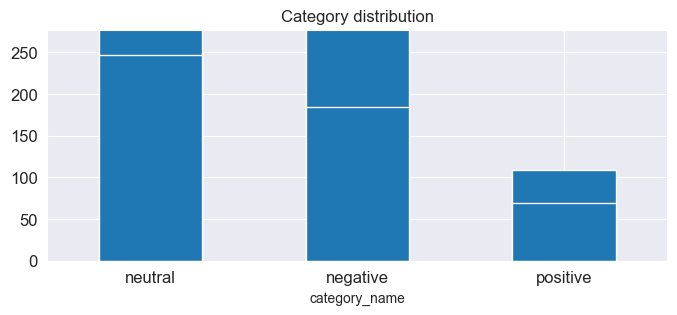

In [131]:
# ==========================================
# Exercise 7
# ==========================================
# Whole dataset
X['category_name'].value_counts().plot(
    kind='bar',
    title='Original Distribution',
    ylim=[0, X['category_name'].value_counts().max() + 50],
    rot=0, fontsize=12, figsize=(8,3)
)

# Sample
X_sample.category_name.value_counts().plot(
    kind='bar',
    title='Category distribution',
    ylim=[0, X_sample.category_name.value_counts().max() + 30],
    rot=0, fontsize=12, figsize=(8, 3)
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sample unigrams from first 3 posts:
Post 1 (first 10 tokens): ['Retardation', 'is', 'on', 'the', 'menu', 'boys', '!', 'WSB', 'is', 'so']
Post 2 (first 10 tokens): ['Retail', 'giant', 'TARGET', 'has', 'now', 'declined', 'for', '10', 'consecutive', 'weeks']
Post 3 (first 10 tokens): ['How', 'do', 'you', 'feel', 'about', 'a', 'sitting', 'president', 'making', '$']


(0.0, 453.0)

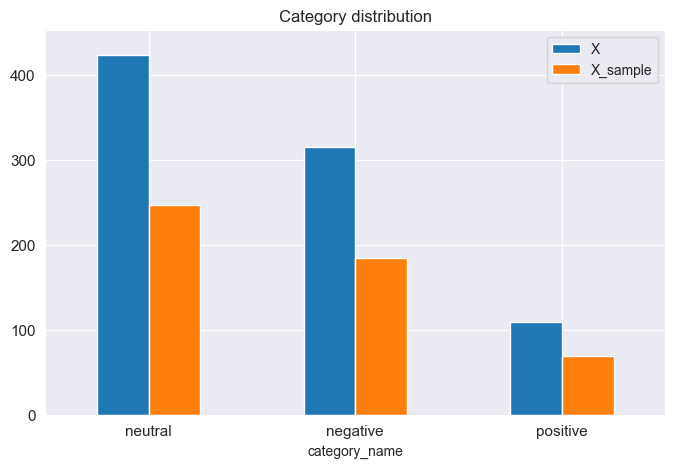

In [132]:
# ==========================================
# Exercise 8
# ==========================================
# Feature Creation
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
from sklearn.feature_extraction.text import CountVectorizer
def tokenize_text(text):
    return nltk.word_tokenize(str(text))
X['unigrams'] = X['text'].apply(tokenize_text)
# Display sample unigrams
print("Sample unigrams from first 3 posts:")
for i in range(3):
    print(f"Post {i+1} (first 10 tokens): {X['unigrams'].iloc[i][:10]}")

# Side-by-side comparison of distributions
df = pd.DataFrame({
    "X": X['category_name'].value_counts(),
    "X_sample": X_sample['category_name'].value_counts()
}).fillna(0).astype(int)

ax = df.plot(kind="bar",
             title="Category distribution",
             rot=0, fontsize=11, figsize=(8,5))

ax.set_ylim(0, df.to_numpy().max() + 30)

In [133]:
# ==========================================
# Exercise 9
# ==========================================
# Feature Subset Selection
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])
print(f"\nDocument-term matrix shape: {X_counts.shape}")
print(f"Vocabulary size: {X_counts.shape[1]}")

# Get feature names
feature_names = count_vect.get_feature_names_out()
print(f"First 10 features: {feature_names[:10]}")

# Analyze the first record
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_vect.fit(X['text'])
analyze = count_vect.build_analyzer()
# Analyze first Reddit post
analyze(X['text'][0])



Document-term matrix shape: (847, 4508)
Vocabulary size: 4508
First 10 features: ['00' '000' '01378' '02' '027' '03' '04' '06' '08' '10']


['retardation',
 'is',
 'on',
 'the',
 'menu',
 'boys',
 'wsb',
 'is',
 'so',
 'back',
 'calls',
 'on',
 'retards']

In [134]:
# ==========================================
# Exercise 10
# ==========================================
X_counts.shape
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [135]:
# Find which words correspond to non-zero values in the matrix
vocab = count_vect.get_feature_names_out()

# Row 2 has a 1 at position 9
print(f"Word at position 9: {vocab[9]}")

# Row 4 has a 3 at position 19
print(f"Word at position 19: {vocab[19]} (appears 3 times)")

# Check what these words are in the actual text
print(f"\nRow 2 text: {X['text'][1][:100]}...")
print(f"Row 4 text: {X['text'][3][:100]}...")

Word at position 9: 10
Word at position 19: 116 (appears 3 times)

Row 2 text: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history ...
Row 4 text: Who knows more? $VMAR Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their co...


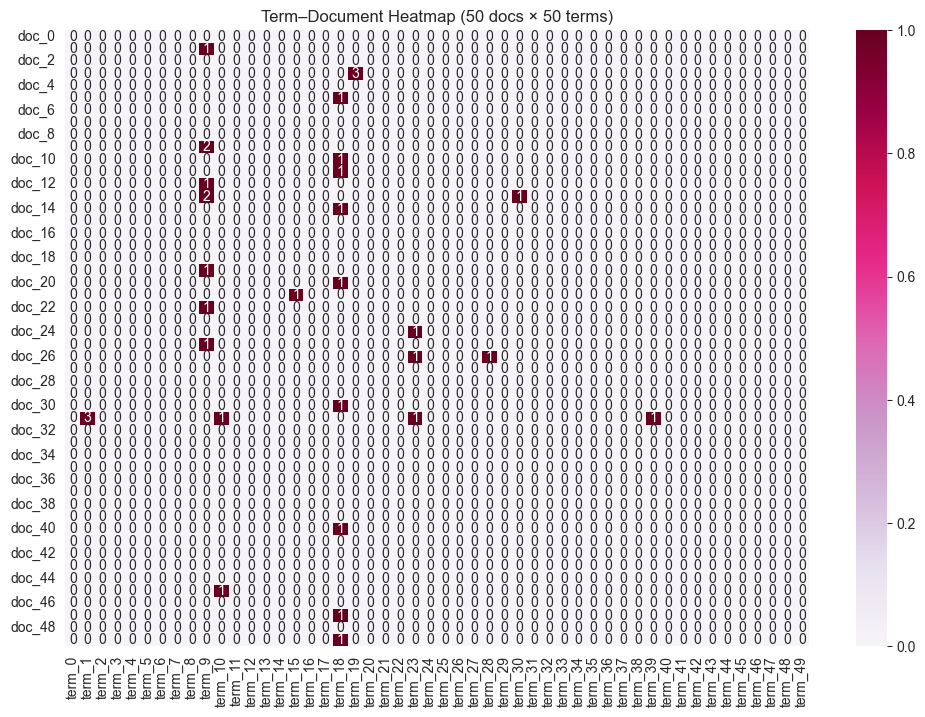

In [136]:
# ==========================================
# Exercise 11
# ==========================================
# Create heatmap of term-document matrix
import matplotlib.pyplot as plt
import seaborn as sns

n_docs  = 50     # rows
n_terms = 50      # columns
plot_z = X_counts[0:n_docs, 0:n_terms].toarray()
plot_x = [f"term_{i}" for i in range(n_terms)]
plot_y = [f"doc_{i}"  for i in range(n_docs)]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(12, 8))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.title(f"Term–Document Heatmap ({n_docs} docs × {n_terms} terms)")
plt.show()

In [137]:
# ==========================================
# Exercise 12
# ==========================================
# Interactive visualization
import plotly.express as px
# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# Get the vocabulary
vocab = count_vect.get_feature_names_out()
# Select top 50 most frequent terms
top_indices = term_frequencies.argsort()[-50:][::-1]
top_terms = [vocab[i] for i in top_indices]
top_frequencies = [term_frequencies[i] for i in top_indices]
# Create interactive bar chart with Plotly
fig = px.bar(x=top_terms, y=top_frequencies,
             title="Top 50 Most Frequent Terms in Reddit Stock Comments",
             labels={'x': 'Terms', 'y': 'Frequency'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Total vocabulary size: 4508 terms


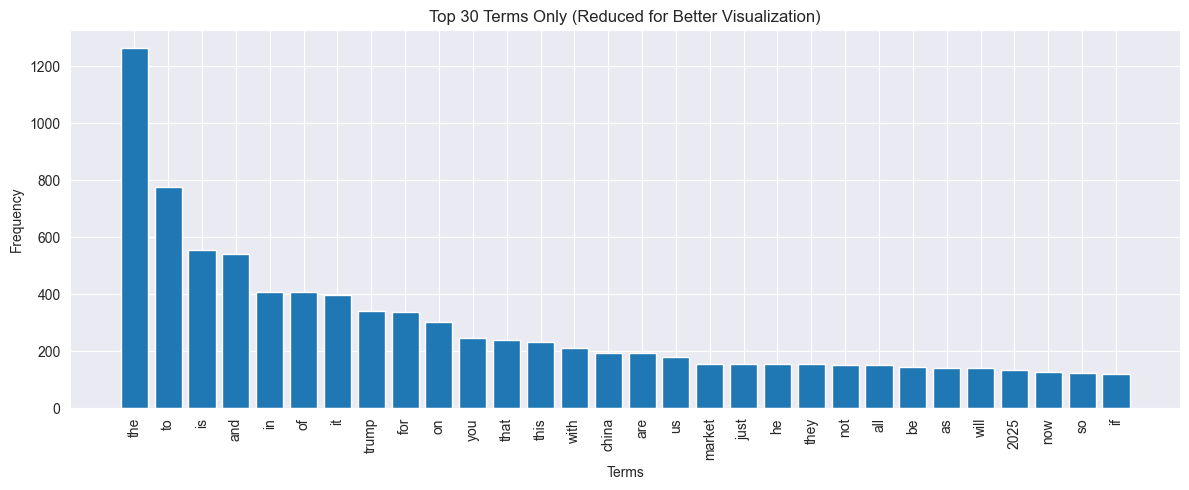

Reduced from 4508 to 30 terms for cleaner visualization


In [138]:
# ==========================================
# Exercise 13
# ==========================================
# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
vocab = count_vect.get_feature_names_out()
print(f"Total vocabulary size: {len(vocab)} terms")
# Take top 30 most frequent words
top_30_indices = term_frequencies.argsort()[-30:][::-1]
top_30_terms = [vocab[i] for i in top_30_indices]
top_30_freqs = [term_frequencies[i] for i in top_30_indices]

# Visualize only these 30 terms
plt.figure(figsize=(12, 5))
plt.bar(range(30), top_30_freqs)
plt.xticks(range(30), top_30_terms, rotation=90)
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Top 30 Terms Only (Reduced for Better Visualization)')
plt.tight_layout()
plt.show()

print(f"Reduced from {len(vocab)} to 30 terms for cleaner visualization")

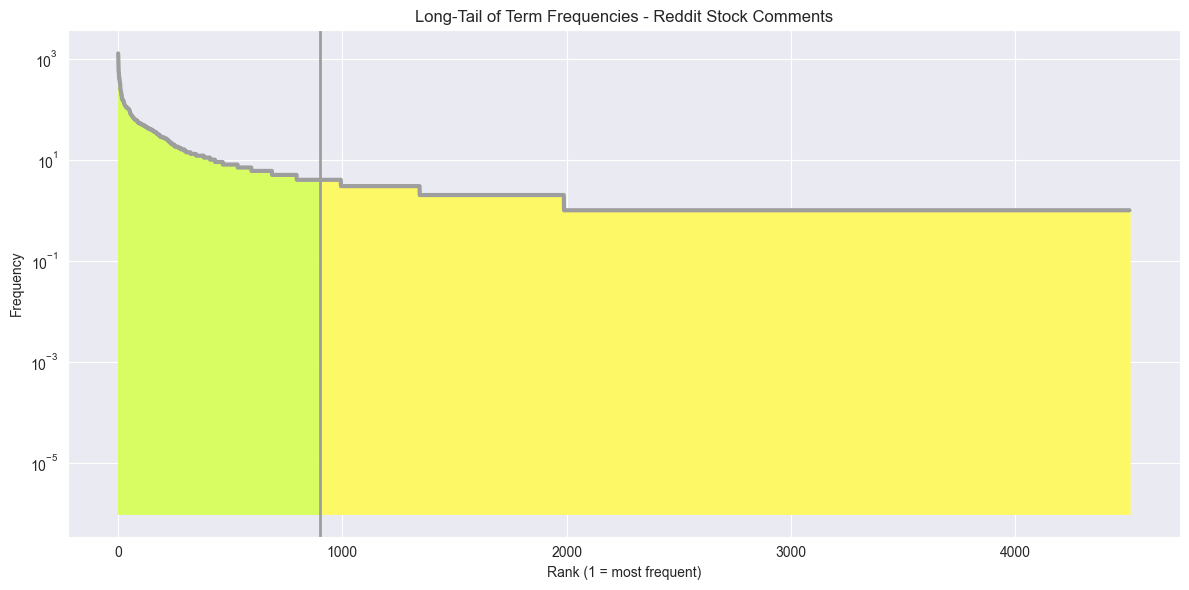

In [139]:
# ==========================================
# Exercise 14
# ==========================================
# # Create the long-tail visualization
import numpy as np
import matplotlib.pyplot as plt
# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# Sort by frequency (descending)
idx = np.argsort(term_frequencies)[::-1]
sorted_freqs = term_frequencies[idx].astype(float)
x = np.arange(1, len(sorted_freqs) + 1)
# Define head as top 20% of terms
head_cut = max(1, int(0.2 * len(sorted_freqs)))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, sorted_freqs, linewidth=3, color="#9e9e9e")  # curve
plt.fill_between(x[:head_cut], sorted_freqs[:head_cut], 1e-6, color="#D6FF5B", alpha=0.95)  # head (top 20%)
plt.fill_between(x[head_cut-1:], sorted_freqs[head_cut-1:], 1e-6, color="#FFF95E", alpha=0.95)
plt.axvline(head_cut, linewidth=2, color="#9e9e9e")
plt.yscale("log")
plt.xlabel("Rank (1 = most frequent)")
plt.ylabel("Frequency")
plt.title("Long-Tail of Term Frequencies - Reddit Stock Comments")
plt.tight_layout()
plt.show()

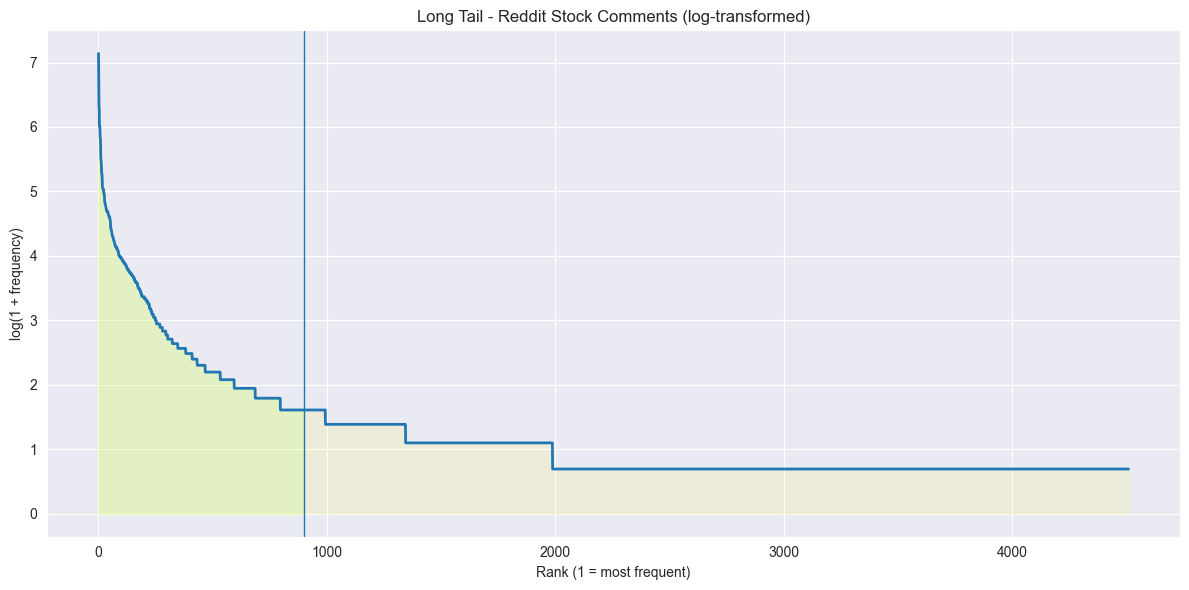

In [140]:
# ==========================================
# Exercise 15
# ==========================================
# Log distribution
# Calculate term frequencies (if not already done)
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Convert to float and sort
freqs = np.asarray(term_frequencies, dtype=float)
rank_idx = np.argsort(freqs)[::-1]
rank = np.arange(1, len(freqs) + 1)
y_log = np.log1p(freqs[rank_idx])  # log transform AFTER ranking

# Define head as top 20% of terms
head_cut = max(1, int(0.2 * len(y_log)))

# Create visualization
plt.figure(figsize=(12, 6))
plt.plot(rank, y_log, linewidth=2)
plt.fill_between(rank[:head_cut], y_log[:head_cut], color="#D6FF5B", alpha=0.3)  # head
plt.fill_between(rank[head_cut-1:], y_log[head_cut-1:], color="#FFF95E", alpha=0.15)  # tail
plt.axvline(head_cut, linewidth=1)
plt.xlabel("Rank (1 = most frequent)")
plt.ylabel("log(1 + frequency)")
plt.title("Long Tail - Reddit Stock Comments (log-transformed)")
plt.tight_layout()
plt.show()

# The log transformation makes the curve flatter:
# Head compresses (high frequencies are less extreme)
# Tail lifts (low frequencies are more visible)
# Easier to see mid-frequency terms
# log1p avoids issues with zero frequencies

# Phase 2

In [141]:
### Begin Assignment Here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [142]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category neutral:


,00,000,01378,027,08,10,100,100k,100x,10k,...,you,young,your,yours,yourself,yoyo,yup,zgld,zone,zsil
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


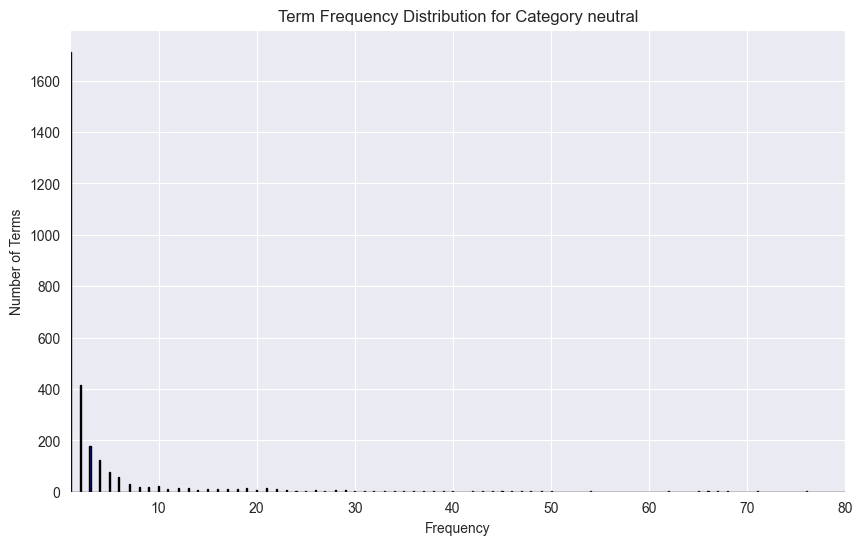

In [143]:
 # Sum over all documents to get total frequency for each word
category_number=1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 80)
plt.show()

In [144]:
category_number=1 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: neutral
Number of terms in top 5%: 144
Filtered terms: ['the', 'to', 'and', 'is', 'of', 'it', 'in', 'for', 'on', 'trump', 'you', 'that', 'this', 'market', 'with', 'are', 'china', 'they', 'not', 'my', 'stock', 'us', '2025', 'all', 'stocks', 'if', 'as', 'thread', 'now', 'just', 'be', 'so', 'like', 'about', 'what', '10', '11', 'was', 'do', 'at', 'but', 'has', 'weekend', 'discussion', 'how', 'tariff', 'or', 'tariffs', 'daily', 'we', 'have', 'he', 'one', 'by', 'an', 'data', 'president', 'will', 'its', '125', 'goods', 'his', 'can', 'futures', 'into', 'dollar', 'up', 'from', 'after', 'silver', 'any', 'your', 'portfolio', 'please', 'price', 'day', 'no', 'right', 'look', 'april', 'year', 'treasuries', 're', 'there', 'their', 'company', 'call', 'losing', 'someone', 'more', 'target', 'off', 'policy', 'x200b', 'own', 'back', 'friday', 'some', 'should', 'retail', 'shows', 'post', 'powell', 'why', 'fundamentals', 'money', 'allies', 'would', 'analysis', 'com', 'apr', 'them', 'want', 'consec

In [145]:
# Explore the frequencies of the **top 5%** words:
print(f"Explore the frequencies of the **top 5%** words:")
print(f"Frequencies sorted in a descending order: {sorted_counts}")
print(f"Indices corresponding to the words after being sorted in a descending order: {sorted_indices}")
print(f"Number of column corresponding to the top 5% words: {filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0)}")

Explore the frequencies of the **top 5%** words:
Frequencies sorted in a descending order: [545 355 229 ...   1   1   1]
Indices corresponding to the words after being sorted in a descending order: [2555 2597  224 ...   48 2873 2870]
Number of column corresponding to the top 5% words: 545


In [146]:
category_number=1 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: neutral
Number of terms in bottom 1%: 28
Filtered terms: ['wutang', 'yahoo', '23', '22rate', 'underway', 'undervalued', 'understanding', 'understand', '17th', '15m', '150', '140', 'yoshitsu', '25bps', '10ks', '100x', '34', '33', '31f', 'yall', '12855584', '1242', 'zsil', '118', 'yoyo', 'zgld', 'zone', '1870']


In [147]:
# Explore the frequencies of the **bottom 1%** words:
print(f"Explore the frequencies of the **bottom 1%** words:")
print(f"Frequencies sorted in a descending order: {sorted_counts}")
print(f"Indices corresponding to the words after being sorted in a descending order: {sorted_indices}")

Explore the frequencies of the **bottom 1%** words:
Frequencies sorted in a descending order: [  1   1   1 ... 229 355 545]
Indices corresponding to the words after being sorted in a descending order: [2870 2873   48 ...  224 2597 2555]


In [148]:
category_number=1 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category negative we filter the following words:
Bottom 1.0% words: 
1973       1
1974       1
02         1
03         1
08         1
1000       1
10000      1
newb       1
musky      1
muslim     1
muslims    1
must       1
myself     1
nak        1
name       1
nancy      1
words      1
24         1
2k         1
2s         1
30         1
160        1
dtype: int64
Top 5.0% words: 
crashing     21
would        21
than         21
right        21
data         21
           ... 
trump       201
and         222
is          257
to          337
the         560
Length: 114, dtype: int64

For category neutral we filter the following words:
Bottom 1.0% words: 
wutang           1
yahoo            1
23               1
22rate           1
underway         1
undervalued      1
understanding    1
understand       1
17th             1
15m              1
150              1
140              1
yoshitsu         1
25bps            1
10ks             1
100x             1
34               1
33          

,00,000,01378,027,08,100,100k,10k,10yr,12,...,years,yes,yesterday,yet,yield,yields,young,yours,yourself,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
# ==========================================
# Exercise 16
# ==========================================
# 1) Get the vocabulary terms in order
terms = np.array(count_vect.get_feature_names_out())
# 2) Turn the sparse term-document matrix into a DataFrame
tdm_df = pd.DataFrame(X_counts.toarray(), columns=terms)
# 3) Attach the category label to each row (document)
tdm_df['category'] = X['category'].values
# 4) Sum term counts within each category
cat_term_totals = tdm_df.groupby('category').sum(numeric_only=True)
# 5) Helper: get top-N terms from a single category row
def top_n_terms(row, n=15): # row is a 1D Series of term counts
    vals = row.values
    idx = np.argsort(vals)[-n:][::-1]  # indices of top n counts
    return list(zip(terms[idx], vals[idx].astype(int)))
# 6) Print the top terms per category
for cat, row in cat_term_totals.iterrows():
    print(f"\n=== {cat} ===")
    for w, c in top_n_terms(row, n=15):
        print(f"{w}: {c}")

# All three classes are dominated by common function words (the, to, and, is, of, in, it), so raw counts mostly reflect corpus size rather than sentiment. Negatives emphasize politics (trump, china), neutrals tilt to finance (market), and positives show more colloquial tone (just) with fewer topical terms.


=== -1.0 ===
the: 560
to: 337
is: 257
and: 222
trump: 201
of: 174
in: 170
it: 164
for: 129
on: 119
that: 108
you: 105
he: 105
china: 104
this: 104

=== 0.0 ===
the: 545
to: 355
and: 229
is: 222
of: 195
it: 185
in: 183
for: 155
on: 144
trump: 119
you: 116
that: 108
this: 98
market: 95
with: 94

=== 1.0 ===
the: 157
and: 90
to: 84
is: 75
in: 56
for: 55
it: 48
on: 41
of: 39
with: 38
this: 29
you: 27
trump: 23
that: 23
just: 22


In [150]:
# ==========================================
# Transactional database creation
# ==========================================
from PAMI.extras.convert.DF2DB import DF2DB

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')

    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])

    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 315
Number of items : 2148
Minimum Transaction Size : 1
Average Transaction Size : 16.117460317460317
Maximum Transaction Size : 145
Standard Deviation Transaction Size : 15.052147868486228
Variance in Transaction Sizes : 227.28870690526742
Sparsity : 0.9924965268540688


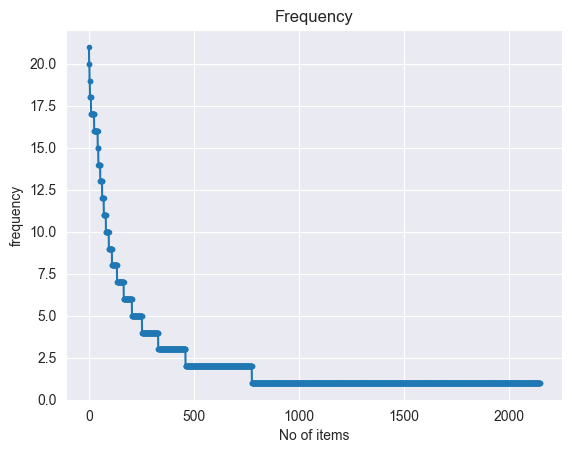

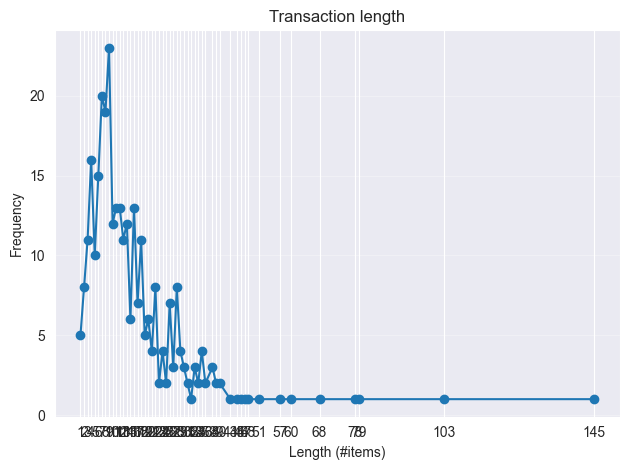

In [151]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 422
Number of items : 2724
Minimum Transaction Size : 1
Average Transaction Size : 14.049763033175356
Maximum Transaction Size : 207
Standard Deviation Transaction Size : 19.36736120483721
Variance in Transaction Sizes : 375.9856412738796
Sparsity : 0.994842230898247


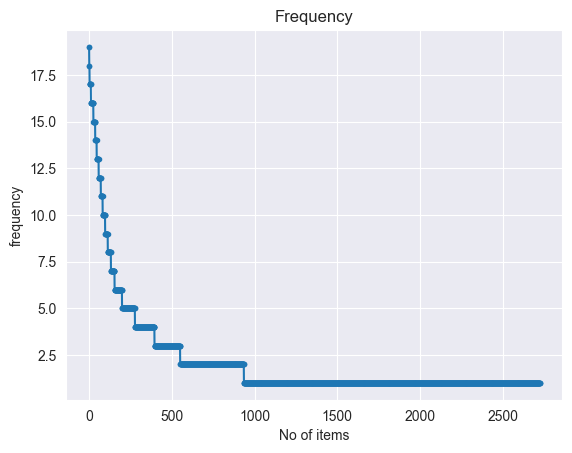

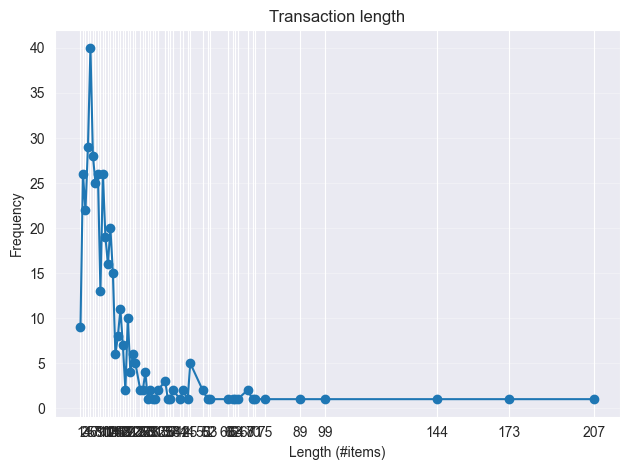

In [152]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 109
Number of items : 1254
Minimum Transaction Size : 3
Average Transaction Size : 19.05504587155963
Maximum Transaction Size : 94
Standard Deviation Transaction Size : 16.800412217739456
Variance in Transaction Sizes : 284.86731226639483
Sparsity : 0.984804588619171


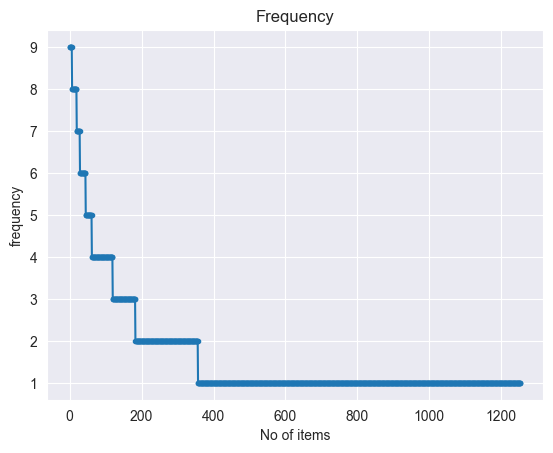

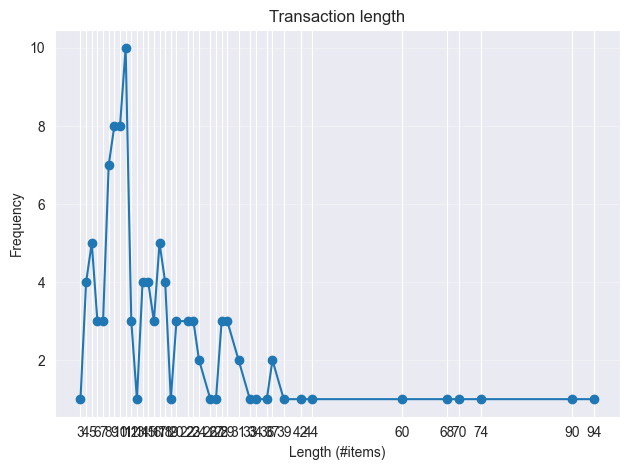

In [153]:
# convert the file to UTF-8
td_freq_db_positive = 'td_freq_db_positive.csv'
td_freq_db_positive_utf8 = 'td_freq_db_positive_utf8.csv'
with open(td_freq_db_positive, 'rb') as f:
    raw = f.read()
# try common Windows encodings; fall back to latin-1
for enc in ['cp1252', 'latin-1']:
    try:
        text = raw.decode(enc)
        break
    except UnicodeDecodeError:
        continue
with open(td_freq_db_positive_utf8, 'w', encoding='utf-8', newline='') as f:
    f.write(text)

from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(td_freq_db_positive_utf8)
obj.run()
obj.printStats()
obj.plotGraphs()

In [154]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 1344
Runtime: 0.0063703060150146484


In [155]:
obj1.save('freq_patterns_negative_minSup9.txt') #save the patterns
frequentPatternsDF_negative

,Patterns,Support
0,boys,9
1,boys\twsb,9
2,menu,9
3,menu\twsb,9
4,menu\tboys,9
...,...,...
1339,breaking,19
1340,apr,20
1341,shows,20
1342,dumping\tshows,20


In [156]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 479
Runtime: 0.008976221084594727


In [157]:
obj2.save('freq_patterns_neutral_minSup9.txt') #save the patterns
frequentPatternsDF_neutral

,Patterns,Support
0,deal,9
1,said,9
2,got,9
3,every,9
4,news,9
...,...,...
474,court\tsupreme\tfederal,17
475,when,18
476,hotline,18
477,don,19


In [158]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile=td_freq_db_positive_utf8, minSup=minSup)
obj3.mine()
frequentPatternsDF_positive= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33
Runtime: 0.0019953250885009766


In [159]:
obj3.save('freq_patterns_positive_minSup9.txt') #save the patterns
frequentPatternsDF_positive

,Patterns,Support
0,awful,9
1,campaign,9
2,awful\tcampaign,9
3,everywhere,9
4,awful\teverywhere,9
5,campaign\teverywhere,9
6,awful\tcampaign\teverywhere,9
7,fucking,9
8,awful\tfucking,9
9,campaign\tfucking,9


In [160]:
# ==========================================
# Unique pattern
# ==========================================
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_negative, frequentPatternsDF_neutral, frequentPatternsDF_positive]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                                               Patterns  Support
1225                                            dumping       21
1222                                                apr       20
1223                                              shows       20
1224                                     dumping\tshows       20
1221                                              value       19
...                                                 ...      ...
1607         awful\teverywhere\tfucking\tmisinformation        9
1608      campaign\teverywhere\tfucking\tmisinformation        9
1609  awful\tcampaign\teverywhere\tfucking\tmisinfor...        9
1610                                              right        9
1611                                              stock        9

[1612 rows x 2 columns]
Number of patterns discarded: 244


In [161]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,04,06,08,10,...,campaign\teverywhere\tmisinformation,campaign\tfucking\tmisinformation,everywhere\tfucking\tmisinformation,awful\tcampaign\teverywhere\tmisinformation,awful\tcampaign\tfucking\tmisinformation,awful\teverywhere\tfucking\tmisinformation,campaign\teverywhere\tfucking\tmisinformation,awful\tcampaign\teverywhere\tfucking\tmisinformation,right,stock
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
# ==========================================
# Exercise 17
# ==========================================
# FPGrowth = all frequent sets (redundant); FAE Top-K = top-K most frequent; MaxFPGrowth = maximal sets (concise, no subsets).
# Counts: FPGrowth ≥ FAE(k=1500) ≥ FAE(k=1000) ≥ FAE(k=500) ≥ MaxFP(sup=3) ≥ MaxFP(sup=6) ≥ MaxFP(sup=9).
# Runtime trend: FAE ↑ runtime as k increases; MaxFP ↓ runtime as minsup increases.
# Overlap: MaxFP patterns often contain FAE/FPGrowth top items as subsets.

from IPython.display import display
from PAMI.frequentPattern.topk.FAE import FAE
# FAE Top-K
category = "negative"
iFile = f"td_freq_db_{category}.csv"
K = 50
topk = FAE(iFile=iFile, k=K)

if hasattr(topk, "mine"):
    topk.mine()
else:
    topk.startMine()
topk_df = topk.getPatternsAsDataFrame()
print(f"[Top-K] Patterns: {len(topk_df)}")
print(f"[Top-K] Runtime (s): {getattr(topk, 'getRuntime', lambda: 'NA')()}")
display(topk_df.head(10))
print(topk_df.head(10).to_string(index=False))

#####
# ---- FAE Top-K ----
from PAMI.frequentPattern.topk.FAE import FAE
DATA_FILE = "td_freq_db_negative.csv"

def run_fae(file, k, sep=","):
    fae = FAE(iFile=file, k=k, sep=sep)
    fae.startMine()
    df = fae.getPatternsAsDataFrame()
    print(f"Top-K={k} | runtime={fae.getRuntime():.4f}s | n_patterns={len(df)}")
    print(df.head(10))
    return df

run_fae(DATA_FILE, 500)
run_fae(DATA_FILE, 1000)
run_fae(DATA_FILE, 1500)

#CONT.... below is for MaxFPgrowth code

 TopK frequent patterns were successfully generated using FAE algorithm.
[Top-K] Patterns: 50
[Top-K] Runtime (s): 0.015422582626342773


,Patterns,Support
0,dumping,21
1,apr,20
2,shows,20
3,dumping shows,20
4,value,19
5,breaking,19
6,fire,18
7,year,18
8,up,18
9,raises,18


     Patterns  Support
      dumping       21
          apr       20
        shows       20
dumping shows       20
        value       19
     breaking       19
         fire       18
         year       18
           up       18
       raises       18
 TopK frequent patterns were successfully generated using FAE algorithm.
Top-K=500 | runtime=0.0120s | n_patterns=314
                                            Patterns  Support
0                                          bob great        2
1            boys calls menu retardation retards wsb        1
2                                     didn say thank        1
3  adjust brutal companies complete denial down d...        1
4  burn continues economy honestly learn led let ...        1
5  asked authority chair christ court federal fir...        1
6  answer because blink bond calls cards ccp chao...        1
7                                               dump        1
8  actually already am americans another assume b...        1
9        

C:\Users\User\AppData\Local\Temp\ipykernel_8184\12643172.py:34: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'mine()' for mining process. Starting from January 2025, 'mine()' will be completely terminated.)

C:\Users\User\AppData\Local\Temp\ipykernel_8184\12643172.py:34: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'mine()' for mining process. Starting from January 2025, 'mine()' will be completely terminated.)

C:\Users\User\AppData\Local\Temp\ipykernel_8184\12643172.py:34: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'mine()' for mining process. Starting from January 2025, 'mine()' will be completely terminated.)



,Patterns,Support
0,bob great,2
1,boys calls menu retardation retards wsb,1
2,didn say thank,1
3,adjust brutal companies complete denial down d...,1
4,burn continues economy honestly learn led let ...,1
...,...,...
309,13 15 17 21 23 31 42 50 60 65 98 aapl amazon a...,1
310,already beyond breaking clearly impeached insa...,1
311,also awful brew campaign disappointed enjoying...,1
312,awful campaign everywhere finance lying misinf...,1


In [163]:
# MaxFPGrowth
# Return only *maximal* frequent patterns
minSup = 10
from PAMI.frequentPattern.maximal import MaxFPGrowth as max_alg
maxfp = max_alg.MaxFPGrowth(iFile=iFile, minSup=minSup)
maxfp.mine()
max_df = maxfp.getPatternsAsDataFrame()
print(f"[MaxFPGrowth] Total maximal patterns: {len(max_df)}")
print(f"[MaxFPGrowth] Runtime: {maxfp.getRuntime()} sec")
display(max_df.head(10))
maxfp.save(f"maximal_patterns_{category}_minSup{minSup}.txt")

#####
# ---- MaxFPGrowth ----
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth
DATA_FILE = "td_freq_db_negative.csv"
def run_maxfp(file, minsup, sep=","):
    m = MaxFPGrowth(iFile=file, minSup=minsup, sep=sep) # set sep="," for CSV
    m.startMine()
    df = m.getPatternsAsDataFrame() # correct method name
    print(f"[MaxFPGrowth] minSup={minsup} | runtime={m.getRuntime():.4f}s | n_patterns={len(df)}")
    print(df.head(10))
    return df
run_maxfp(DATA_FILE, 3)
run_maxfp(DATA_FILE, 6)
run_maxfp(DATA_FILE, 9)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] Total maximal patterns: 66
[MaxFPGrowth] Runtime: 0.008974075317382812 sec


,Patterns,Support
0,again,10
1,trading,10
2,bad,10
3,trust,10
4,american,10
5,sure,10
6,sentiment,10
7,your,10
8,history,10
9,these,10


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=3 | runtime=0.0010s | n_patterns=0
Empty DataFrame
Columns: [Patterns, Support]
Index: []
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=6 | runtime=0.0010s | n_patterns=0
Empty DataFrame
Columns: [Patterns, Support]
Index: []
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=9 | runtime=0.0010s | n_patterns=0
Empty DataFrame
Columns: [Patterns, Support]
Index: []


C:\Users\User\AppData\Local\Temp\ipykernel_8184\2178348322.py:19: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'mine()' for mining process. Starting from January 2025, 'mine()' will be completely terminated.)

C:\Users\User\AppData\Local\Temp\ipykernel_8184\2178348322.py:19: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'mine()' for mining process. Starting from January 2025, 'mine()' will be completely terminated.)

C:\Users\User\AppData\Local\Temp\ipykernel_8184\2178348322.py:19: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'mine()' for mining process. Starting from January 2025, 'mine()' will be completely terminated.)



,Patterns,Support


In [164]:
# ==========================================
# Dimensionality reduction
# ==========================================
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [165]:
X_pca_tdm.shape

(847, 2)

In [166]:
X_tsne_tdm.shape

(847, 2)

In [167]:
X_umap_tdm.shape

(847, 2)

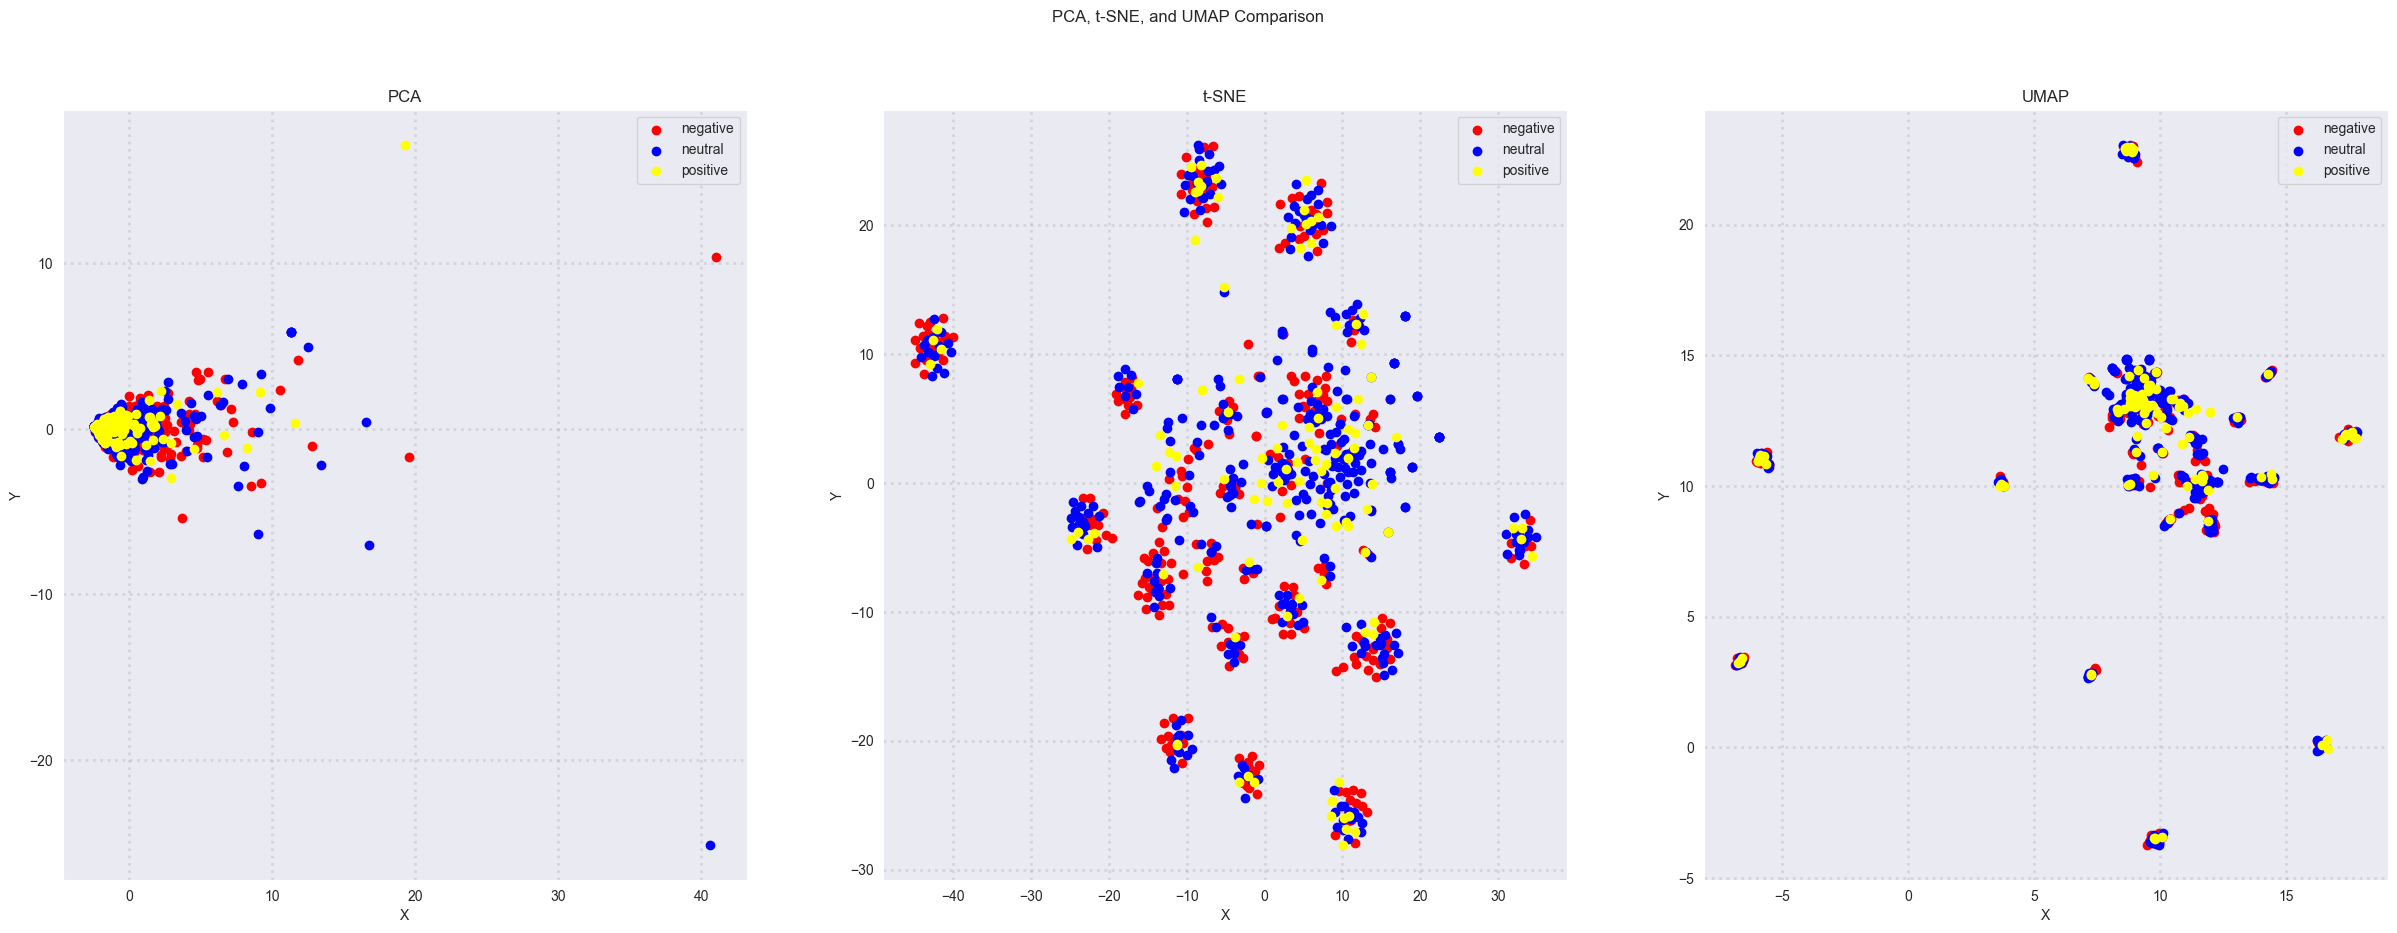

In [168]:
# Plot the results in subplots
col = ['red', 'blue', 'yellow']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [169]:
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

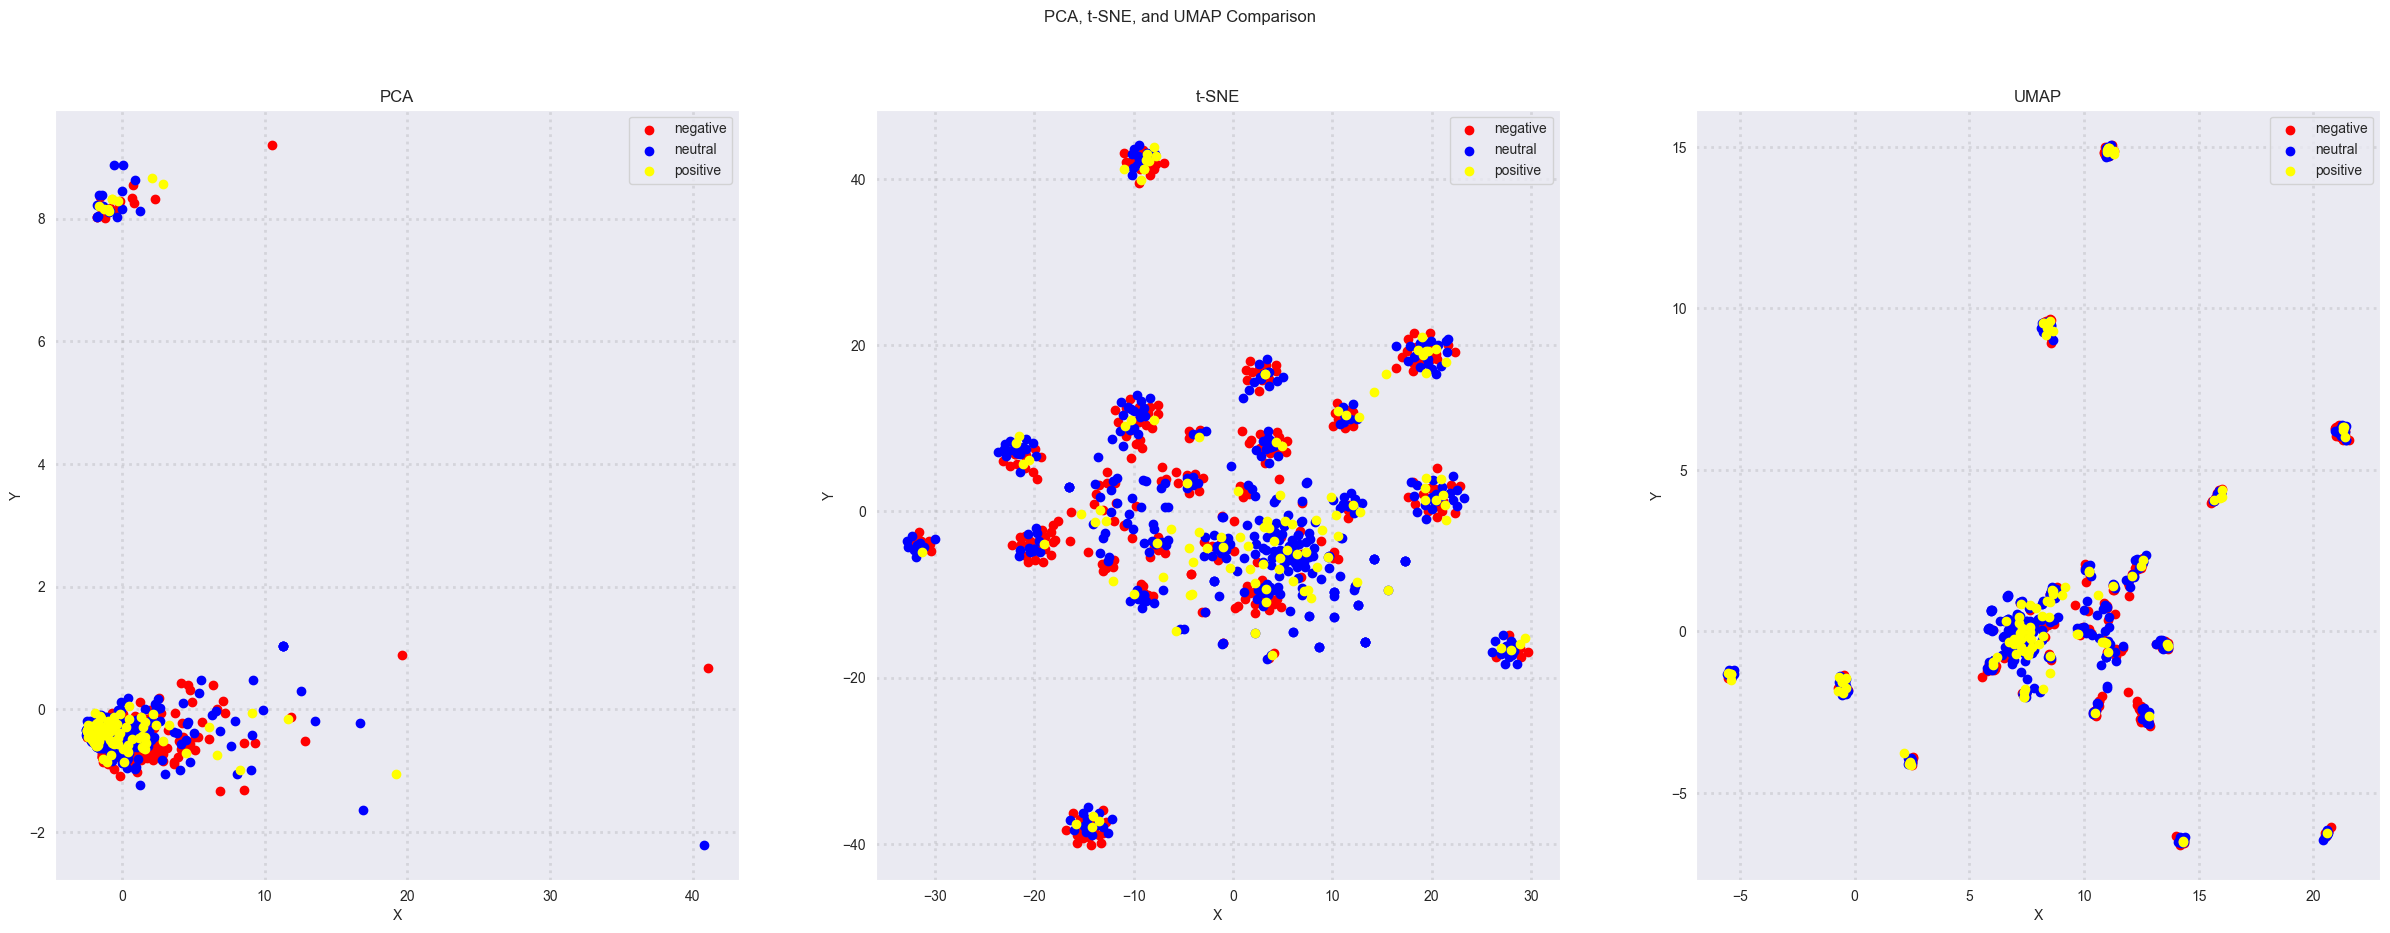

In [170]:
# Plot the results in subplots
col = ['red', 'blue', 'yellow']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

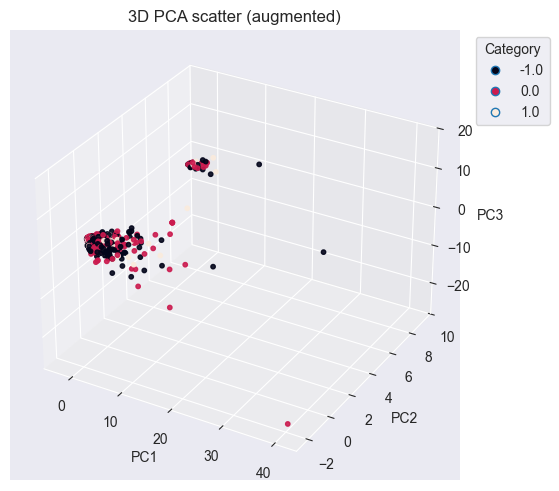

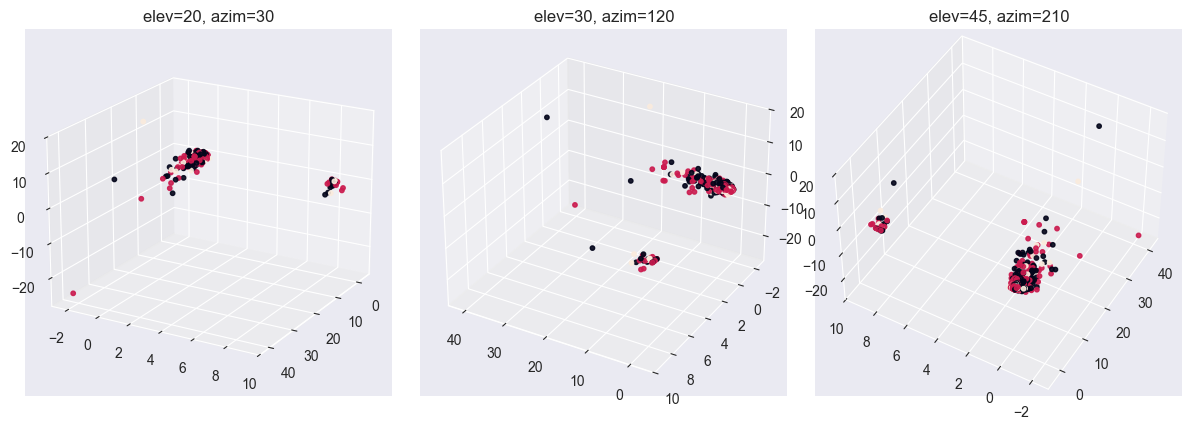

In [171]:
# ==========================================
# Exercise 18
# ==========================================
# 3D allows us to see distribution that is hidden from 2D view.
# Mostly one dense cluster with a few small offshoots; classes (−1, 0, +1) overlap a lot.
# The cloud stretches along one main axis, so PCA-3 doesn’t separate sentiments clearly.

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#1) Pick features
if 'augmented_df' in globals():
    features = augmented_df.values
    title_suffix = "(augmented)"
elif 'tdm_df' in globals():
    features = tdm_df.values
    title_suffix = "(tdm)"
else:
    raise ValueError("Need 'tdm_df' or 'augmented_df'.")

# 2) 3D PCA
X3 = PCA(n_components=3, random_state=0).fit_transform(features)

# 3) Labels for color (category or category_name)
if 'category' in X.columns:
    labels = X['category'].astype(str).values
elif 'category_name' in X.columns:
    labels = X['category_name'].astype(str).values
else:
    labels = np.array(['All'] * len(X3))

# Convert labels to numbers for coloring
y, classes = pd.factorize(labels)

# 4) Plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=y, s=10, alpha=0.9)

ax.set_title(f"3D PCA scatter {title_suffix}")
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")

handles = [plt.Line2D([0],[0], marker='o', linestyle='', markersize=6,
                      label=cls, markerfacecolor=sc.cmap(sc.norm(i)))
           for i, cls in enumerate(classes[:10])] # show up to 10 to keep it tidy
if handles:
    ax.legend(handles=handles, title="Category", bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

########
fig = plt.figure(figsize=(12, 4))

# 1st angle
ax1 = fig.add_subplot(1,3,1, projection='3d')
ax1.scatter(X3[:,0], X3[:,1], X3[:,2], c=y, s=10, alpha=0.9)
ax1.view_init(elev=20, azim=30)          # ← angle #1
ax1.set_title("elev=20, azim=30")

# 2nd angle
ax2 = fig.add_subplot(1,3,2, projection='3d')
ax2.scatter(X3[:,0], X3[:,1], X3[:,2], c=y, s=10, alpha=0.9)
ax2.view_init(elev=30, azim=120)         # ← angle #2
ax2.set_title("elev=30, azim=120")

# 3rd angle
ax3 = fig.add_subplot(1,3,3, projection='3d')
ax3.scatter(X3[:,0], X3[:,1], X3[:,2], c=y, s=10, alpha=0.9)
ax3.view_init(elev=45, azim=210)         # ← angle #3
ax3.set_title("elev=45, azim=210")

plt.tight_layout()
plt.show()


In [172]:
# ==========================================
# Discretization and Binarization
# ==========================================
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:10]


,text,category,category_name,unigrams,tokenized_text,bin_category
0,Retardation is on the menu boys! WSB is so bac...,-1.0,negative,"[Retardation, is, on, the, menu, boys, !, WSB,...","{so, Retardation, Calls, is, WSB, the, on, men...","[1, 0, 0]"
1,Retail giant TARGET has now declined for 10 co...,0.0,neutral,"[Retail, giant, TARGET, has, now, declined, fo...","{place?, in, for, Stunt, a, ever, like, weeks,...","[0, 1, 0]"
2,How do you feel about a sitting president maki...,0.0,neutral,"[How, do, you, feel, about, a, sitting, presid...","{own, in, pumping, after, a, day, decision?, p...","[0, 1, 0]"
3,Who knows more? $VMAR Vision Marine Technologi...,1.0,positive,"[Who, knows, more, ?, $, VMAR, Vision, Marine,...","{propelling, 116, for, feat, water, watercraft...","[0, 0, 1]"
4,The Trump administration is begging Xi Jinping...,-1.0,negative,"[The, Trump, administration, is, begging, Xi, ...","{you., The, quickly., Xi, begging, Trump, than...","[1, 0, 0]"
5,Weekend Discussion Thread for the Weekend of A...,0.0,neutral,"[Weekend, Discussion, Thread, for, the, Weeken...","{in, for, 11,, luck, Hoping, warm, the, wish, ...","[0, 1, 0]"
6,Is the market in complete denial right now? Tr...,-1.0,negative,"[Is, the, market, in, complete, denial, right,...","{in, next, Jerome, personally, i, denial, resp...","[1, 0, 0]"
7,Retardation is on the menu boys! WSB is so bac...,0.0,neutral,"[Retardation, is, on, the, menu, boys, !, WSB,...","{for, probably, we, not, a, let, like, Confirm...","[0, 1, 0]"
8,"It's fucking awful seeing the ""Silver"" misinfo...",1.0,positive,"[It, 's, fucking, awful, seeing, the, ``, Silv...","{Third, base, only, cup, here?, week, Perfectl...","[0, 0, 1]"
9,Any cheap stocks under $10? HLGN is $10. Hurry...,1.0,positive,"[Any, cheap, stocks, under, $, 10, ?, HLGN, is...","{$10., shoots, is, and, moon!, HLGN, the, now,...","[0, 0, 1]"


In [173]:
# ==========================================
# Exercise 19
# ==========================================
from sklearn import preprocessing

# 1) Create the binarizer
lb = preprocessing.LabelBinarizer()
# 2) Fit on the string labels and transform
lb.fit(X["category_name"])
bin_mat = lb.transform(X["category_name"]) # shape: (n_samples, n_classes)
# 3) Store as a new column (list of 0/1 per row)
X["bin_category_name"] = bin_mat.tolist()
# 4) (Optional) Inspect: classes order and the first few rows
print("Classes (column order):", lb.classes_)
X.loc[:9, ["category_name", "bin_category_name"]]

Classes (column order): ['negative' 'neutral' 'positive']


,category_name,bin_category_name
0,negative,"[1, 0, 0]"
1,neutral,"[0, 1, 0]"
2,neutral,"[0, 1, 0]"
3,positive,"[0, 0, 1]"
4,negative,"[1, 0, 0]"
5,neutral,"[0, 1, 0]"
6,negative,"[1, 0, 0]"
7,neutral,"[0, 1, 0]"
8,positive,"[0, 0, 1]"
9,positive,"[0, 0, 1]"


In [174]:
# ==========================================
# Data exploration
# ==========================================
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[200]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)


["r/Stocks Daily Discussion & Fundamentals Friday Apr 11, 2025 It's a copy/paste from a Bloomberg terminal."]
['The Trump administration is begging Xi Jinping to call Trump quickly. Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
['Trump: We Are Doing Really Well On Our Tariff Policy. I need people to understand this man is NOT stupid. You want him to be so bad but he is NOT. Everything he is currently doing is apart of the plan. The major goal is to crash the economy and the USD and build a new US and USD. Please wake up.']


In [175]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [176]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.046524
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.345425
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_8184\3918110866.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_8184\3918110866.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_8184\3918110866.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_8184\3918110866.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

In [177]:
# ==========================================
# Exercise 20
# ==========================================
# The largest off-diagonal value marks the two texts that are most alike in vocabulary/theme. If that pair shares the same label, TF-IDF similarity aligns with labels; if not, there may be label noise or cross-topic overlap.
# Very low scores (<0.2) = mostly different topics/terms; mid (0.2–0.5) = partial overlap; high (≥0.7) = very similar/near-duplicate content.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
idx1, idx2, idx3 = 10, 100, 200
# 1) Get the texts
texts = [
    str(X.loc[idx1, "text"]),
    str(X.loc[idx2, "text"]),
    str(X.loc[idx3, "text"]) ]

labels = []
for i in [idx1, idx2, idx3]:
    if "category_name" in X.columns:
        labels.append(str(X.loc[i, "category_name"]))
    elif "category" in X.columns:
        labels.append(str(X.loc[i, "category"]))
    else:
        labels.append("n/a")

# 2) Vectorize with TF-IDF
vec = TfidfVectorizer(lowercase=True, stop_words="english")
X_tfidf = vec.fit_transform(texts)

# 3) Cosine similarity matrix
cos_mat = cosine_similarity(X_tfidf)

#4) Put into a small table
def preview(t, n=70):
    return t[:n] + ("…" if len(t) > n else "")
row_names = [
    f"Text 1 | label={labels[0]}\n{preview(texts[0])}",
    f"Text 2 | label={labels[1]}\n{preview(texts[1])}",
    f"Text 3 | label={labels[2]}\n{preview(texts[2])}",
]
cos_df = pd.DataFrame(cos_mat, index=row_names, columns=["Text 1", "Text 2", "Text 3"])

print("Cosine similarity (0 to 1; diagonal = 1.0):")
display(cos_df)

#5) Quick interpretation tips
print("\nNote:")
print("• Values close to 1.0 → texts more similar.")
print("• 0.2–0.5 → partial overlap terms.")
print("• <0.2 → mostly different terms.")


Cosine similarity (0 to 1; diagonal = 1.0):


,Text 1,Text 2,Text 3
"Text 1 | label=neutral\nr/Stocks Daily Discussion & Fundamentals Friday Apr 11, 2025 It's a co…",1.000000,0.040308,0.000000
Text 2 | label=negative\nThe Trump administration is begging Xi Jinping to call Trump quickly. …,0.040308,1.000000,0.076969
Text 3 | label=positive\nTrump: We Are Doing Really Well On Our Tariff Policy. I need people to…,0.000000,0.076969,1.000000



Note:
• Values close to 1.0 → texts more similar.
• 0.2–0.5 → partial overlap terms.
• <0.2 → mostly different terms.


In [178]:
# ==========================================
# Data classification
# ==========================================
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)


In [179]:
X_train

,00,000,01378,02,027,03,04,06,08,10,...,yourself,yourselves,youtube,yoyo,ytd,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
X_test

,00,000,01378,02,027,03,04,06,08,10,...,yourself,yourselves,youtube,yoyo,ytd,yup,zero,zgld,zone,zsil
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5686274509803921

Classification Report:
               precision    recall  f1-score   support

    negative     0.5410    0.6735    0.6000        98
     neutral     0.6047    0.6446    0.6240       121
    positive     0.2500    0.0278    0.0500        36

    accuracy                         0.5686       255
   macro avg     0.4652    0.4486    0.4247       255
weighted avg     0.5301    0.5686    0.5337       255



In [182]:
# ==========================================
# Exercise 21
# ==========================================
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

X_aug = augmented_df
y = X['category'] # numeric labels

#1) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_aug, y, test_size=0.3, random_state=42
)
#2) Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
#3) Predict and evaluate
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (augmented features): {acc:.4f}\n")
print("Classification report (augmented features):")
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy (augmented features): 0.5686

Classification report (augmented features):
              precision    recall  f1-score   support

    negative     0.5508    0.6633    0.6019        98
     neutral     0.6031    0.6529    0.6270       121
    positive     0.1667    0.0278    0.0476        36

    accuracy                         0.5686       255
   macro avg     0.4402    0.4480    0.4255       255
weighted avg     0.5214    0.5686    0.5355       255



In [183]:
# ==========================================
# Exercise 22
# ==========================================
# The augmented features didn’t improve Naive Bayes—accuracy stayed ~0.55 and dipped slightly (0.5529 → 0.5490).
# Class 1.0 is still never predicted, pointing to class imbalance and weak signal for that class.
# Augmentation gave a small gain for class 0.0 but slightly worsened −1.0, so macro/weighted F1 changed trivially.
# Likely reasons: feature–model mismatch (MultinomialNB favors nonnegative count-like inputs), high-dimensional noise, and imbalance.

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

y = X['category']

def eval_mat(name, M):
    Xtr, Xte, ytr, yte = train_test_split(M, y, test_size=0.3, random_state=42, stratify=y)
    clf = MultinomialNB().fit(Xtr, ytr)
    yp = clf.predict(Xte)
    print(f"\n=== {name} ===")
    print("Accuracy:", round(accuracy_score(yte, yp), 4))
    print(classification_report(yte, yp, digits=4))

eval_mat("Original TDM (tdm_df)", tdm_df)
eval_mat("Augmented (augmented_df)", augmented_df)


=== Original TDM (tdm_df) ===
Accuracy: 0.5529
              precision    recall  f1-score   support

        -1.0     0.5391    0.7263    0.6188        95
         0.0     0.6154    0.5669    0.5902       127
         1.0     0.0000    0.0000    0.0000        33

    accuracy                         0.5529       255
   macro avg     0.3848    0.4311    0.4030       255
weighted avg     0.5073    0.5529    0.5245       255


=== Augmented (augmented_df) ===
Accuracy: 0.549
              precision    recall  f1-score   support

        -1.0     0.5508    0.6842    0.6103        95
         0.0     0.6198    0.5906    0.6048       127
         1.0     0.0000    0.0000    0.0000        33

    accuracy                         0.5490       255
   macro avg     0.3902    0.4249    0.4051       255
weighted avg     0.5139    0.5490    0.5286       255



In [184]:
# ==========================================
# Decision Tree Classifier
# ==========================================
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5019607843137255

Classification Report:
               precision    recall  f1-score   support

    negative     0.5227    0.4694    0.4946        98
     neutral     0.5298    0.6612    0.5882       121
    positive     0.1250    0.0556    0.0769        36

    accuracy                         0.5020       255
   macro avg     0.3925    0.3954    0.3866       255
weighted avg     0.4699    0.5020    0.4801       255



In [185]:
# ==========================================
# Exercise 23
# ==========================================
# Text is high-dimensional + sparse: Trees need many splits to capture tiny word signals. They overfit and generalize poorly.
# High variance/ instability: Small data changes → very different trees. NB is low-variance with smoothing.
# NB matches bag-of-words well: Multinomial NB models token counts directly with simple independence assumptions that work surprisingly well.
# Thresholding loses information: Tree splits binarize/threshold TF/TF-IDF values, wasting subtle frequency cues NB uses.
# Many weak features: Additive log-odds in NB aggregates thousands of weak signals. A single tree can’t combine them efficiently.

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

y = X['category']
Xtr, Xte, ytr, yte = train_test_split(tdm_df, y, test_size=0.3, random_state=42, stratify=y)

nb = MultinomialNB().fit(Xtr, ytr)
dt = DecisionTreeClassifier(random_state=42).fit(Xtr, ytr)

print("Naive Bayes accuracy:", round(accuracy_score(yte, nb.predict(Xte)), 4))
print("Decision Tree accuracy:", round(accuracy_score(yte, dt.predict(Xte)), 4))

Naive Bayes accuracy: 0.5529
Decision Tree accuracy: 0.4706


In [186]:
# ==========================================
# Exercise 24
# ==========================================
# Did augmented data improve vs original TDM?
# Augmentation didn’t help overall. NB went 0.5529 → 0.5490 (slightly worse). DT went 0.4706 → 0.4784 (slightly better) but still far below NB.

# Is it better than Naive Bayes?
# No. On augmented data, Naive Bayes still wins (0.5490) vs Decision Tree (0.4784).

# The reasons are:...
# Text is high-dimensional & sparse → NB fits well; trees overfit/are unstable.
# Extra features likely add noise; NB (Multinomial) prefers count-like signals.
# Single DT overfits sparse, high-dimensional text and misses signal spread across many weak features.
# Class imbalance persists (class 1.0 underlearned).

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

y = X['category']
Xtr, Xte, ytr, yte = train_test_split(augmented_df, y, test_size=0.3, random_state=42, stratify=y)

nb = MultinomialNB().fit(Xtr, ytr)
dt = DecisionTreeClassifier(random_state=42).fit(Xtr, ytr)

print("Augmented NB accuracy:", round(accuracy_score(yte, nb.predict(Xte)), 4))
print("Augmented DT accuracy:", round(accuracy_score(yte, dt.predict(Xte)), 4))

Augmented NB accuracy: 0.549
Augmented DT accuracy: 0.4784


In [187]:
# ==========================================
# Exercise 25
# ==========================================
#Answer
# Pick a goal + metric (accuracy if balanced; F1/PR-AUC if imbalanced).
# Honest eval: train/test split once; use Stratified K-Fold CV on train only.
# Try a small set: Dummy → LogisticReg, Naive Bayes, Linear SVM, Random Forest.
# Use Pipelines and light tuning (tiny grid/random search).
# Choose by CV mean ± std on your metric; if close, pick simpler/faster.
# Finalize: retrain winner on full training data; test once; report metrics.

# Below analysis:
# Pick: LogisticRegression — highest mean accuracy (0.5749 ± 0.0443).
# Backup: NaiveBayes — very close and more stable (0.5690 ± 0.0333).
# Consider: LinearSVM — lower and had convergence warnings (0.5478 ± 0.0472); tune C/max_iter if using.
# Not choose: DecisionTree — lowest (0.5230 ± 0.0315).

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

y = X['category']
X_feat = augmented_df # or tdm_df
models = {
    "NaiveBayes": MultinomialNB(),
    "LogReg": LogisticRegression(max_iter=200, n_jobs=None),
    "LinearSVM": LinearSVC(),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, clf in models.items():
    acc = cross_val_score(clf, X_feat, y, cv=cv, scoring="accuracy")
    print(f"{name}: mean acc={acc.mean():.4f} ± {acc.std():.4f}")

NaiveBayes: mean acc=0.5690 ± 0.0333
LogReg: mean acc=0.5749 ± 0.0443


D:\NguyenNKTruong\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\NguyenNKTruong\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\NguyenNKTruong\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVM: mean acc=0.5478 ± 0.0472
DecisionTree: mean acc=0.5230 ± 0.0315
